# Knn na doença não separável linearmente

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('nova_doenca2.csv',sep=';')
df.head(),len(df)

(   indicador1  indicador2  diagnóstico
 0           1           3            1
 1           2           3            0
 2           2           8            1
 3           5           8            0
 4           8          10            1, 10)

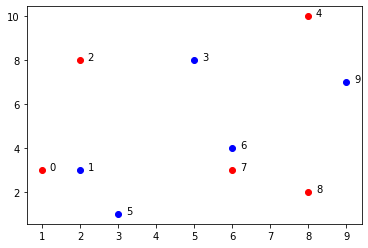

In [ ]:
for i in range(len(df)):
    if df['diagnóstico'].iloc[i]==1:
        plt.plot(df.iloc[i,0],df.iloc[i,1],'ro')
    else:plt.plot(df.iloc[i,0],df.iloc[i,1],'bo')
    plt.text(df.iloc[i,0]+0.2,df.iloc[i,1],str(i))
plt.show()

Obter a acurácia com regressão logística e sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
rl=LogisticRegression()
X=np.array(df)[:,:-1]
y=np.array(df['diagnóstico'])
X,y
rl.fit(X,y)
ye=rl.predict(X)
accuracy_score(y,ye)

0.5

Crie a função dist, com a distância Euclidiana entre dois vetores

In [ ]:
def dist(v1,v2):
    
    return np.linalg.norm(v2-v1)



Teste a função dist com os vetores (1,1) e (2,2)...o resultado deve ser 1.414..

In [ ]:
dist(np.array([1,1]),np.array([2,2]))

1.4142135623730951

Crie uma função v_dist que retornará um array (ordenado pela distância do vetor v a cada linha de X) com tuplas t, sendo t[0]:distância, t[1] a linha de X e t[2] o y correspondente à linha

In [ ]:
def v_dist(v,X,y):
    vd=[]
    for i in range(len(X)):
      vd.append((i,np.linalg.norm(v-X[i]),y[i]))
    vd.sort(key=lambda x:x[1])
    
    return np.array(vd)

In [ ]:
v_dist(np.array([7,3]),X,y)

array([[7.        , 1.        , 1.        ],
       [6.        , 1.41421356, 0.        ],
       [8.        , 1.41421356, 1.        ],
       [5.        , 4.47213595, 0.        ],
       [9.        , 4.47213595, 0.        ],
       [1.        , 5.        , 0.        ],
       [3.        , 5.38516481, 0.        ],
       [0.        , 6.        , 1.        ],
       [2.        , 7.07106781, 1.        ],
       [4.        , 7.07106781, 1.        ]])

Crie uma função de predição, que recebe v,X e y e retorna a classe prevista, suponha k=5

In [ ]:
def predict(v,X,y):
  d=v_dist(v,X,y)
  soma=0
  for i in range(5):
    soma+=d[i,2]
  if soma>2:return 1
  else:return 0

  
    



In [ ]:
predict(np.array([7,3]),X,y)

0

Calcular a acurácia na amostra toda

In [ ]:
ye=[]
for i in range(len(X)):
    ye.append(predict(X[i],X,y))
ye=np.array(ye)   
accuracy_score(ye,y)

0.6